In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("D:/Case_Competition/Factelytics_Case Study/train data.csv")

In [3]:
df_train.head(10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,NaN,0,unknown,1
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,NaN,0,unknown,1
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,210.0,1.0,NaN,0,unknown,0
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,NaN,0,unknown,0
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,NaN,0,unknown,0


In [4]:
train=df_train

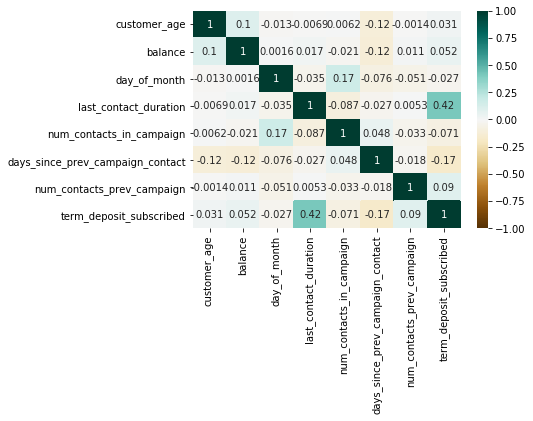

In [5]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [6]:
train.shape

(31647, 18)

In [7]:
train.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [9]:
train.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


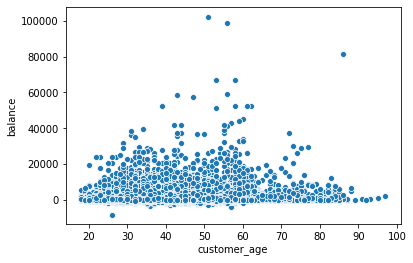

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="customer_age",y="balance",data=train)

In [11]:
mean_age=train["customer_age"].mean()

In [12]:
train["customer_age"]=train["customer_age"].fillna(mean_age)

In [13]:
train["marital"].value_counts()

married     18945
single       8857
divorced     3695
Name: marital, dtype: int64

In [14]:
train["marital"]=train["marital"].fillna(train["marital"].mode()[0])

In [15]:
balance_martial=train["balance"].groupby(train["marital"]).mean()
balance_martial

marital
divorced    1224.378867
married     1431.480864
single      1291.738122
Name: balance, dtype: float64

In [16]:
for row in range(1,len(train)):
    train.at[row,"balance"]=np.where(pd.isnull(train.at[row,"balance"]),balance_martial.loc[(balance_martial.index==train.at[row,"marital"]),],train.at[row,"balance"])

In [17]:
train["personal_loan"].value_counts()

no     26463
yes     5035
Name: personal_loan, dtype: int64

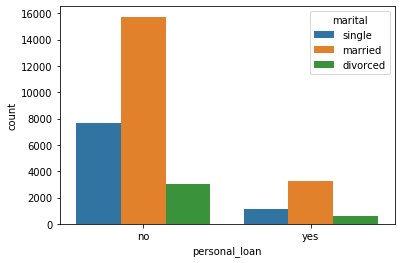

In [18]:
sns.countplot(x="personal_loan",hue="marital",data=train)

In [19]:
train["personal_loan"]=train["personal_loan"].fillna(train["personal_loan"].mode()[0])

In [20]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [21]:
train[train["balance"].isnull()]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed


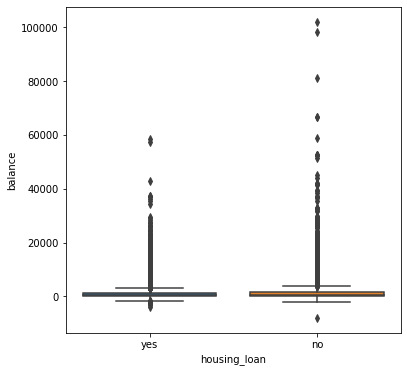

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(y="balance", x="housing_loan", data=train)

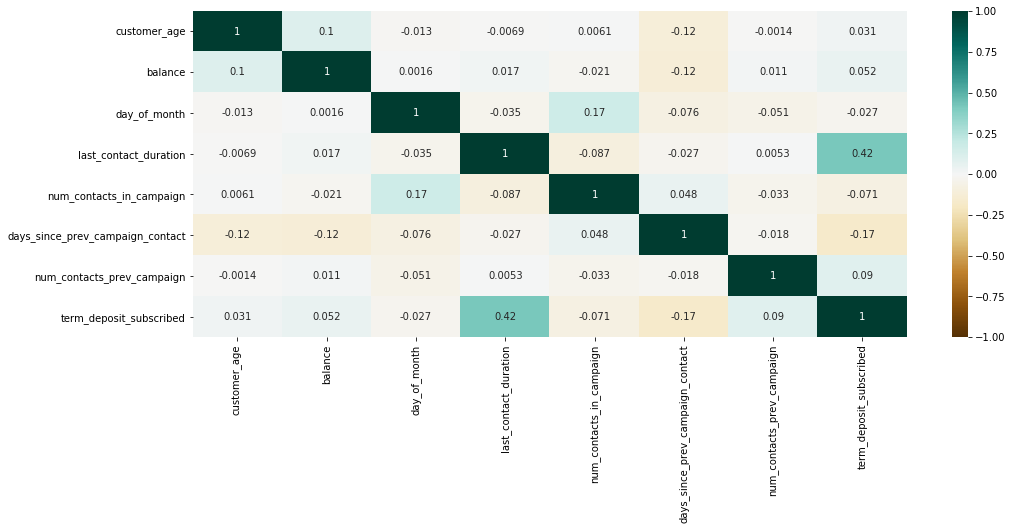

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.savefig('output.png', dpi=300, bbox_inches='tight')

In [24]:
train.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          31647 non-null  object 
 1   customer_age                31647 non-null  float64
 2   job_type                    31647 non-null  object 
 3   marital                     31647 non-null  object 
 4   education                   31647 non-null  object 
 5   default                     31647 non-null  object 
 6   balance                     31647 non-null  float64
 7   housing_loan                31647 non-null  object 
 8   personal_loan               31647 non-null  object 
 9   communication_type          31647 non-null  object 
 10  day_of_month                31647 non-null  int64  
 11  month                       31647 non-null  object 
 12  last_contact_duration       31336 non-null  float64
 13  num_contacts_in_campaign    315

In [26]:
job_type=train["last_contact_duration"].groupby(train["job_type"]).mean()

In [27]:
for row in range(1,len(train)):
    train.at[row,"last_contact_duration"]=np.where(pd.isnull(train.at[row,"last_contact_duration"]),job_type.loc[(job_type.index==train.at[row,"job_type"]),],train.at[row,"last_contact_duration"])

In [28]:
train["job_type"].value_counts()

blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64

In [29]:
train["num_contacts_in_campaign"].groupby(train["job_type"]).mean()

job_type
admin.           2.582803
blue-collar      2.815344
entrepreneur     2.854932
housemaid        2.812148
management       2.875905
retired          2.373897
self-employed    2.896490
services         2.760220
student          2.286576
technician       2.931399
unemployed       2.355951
unknown          3.373737
Name: num_contacts_in_campaign, dtype: float64

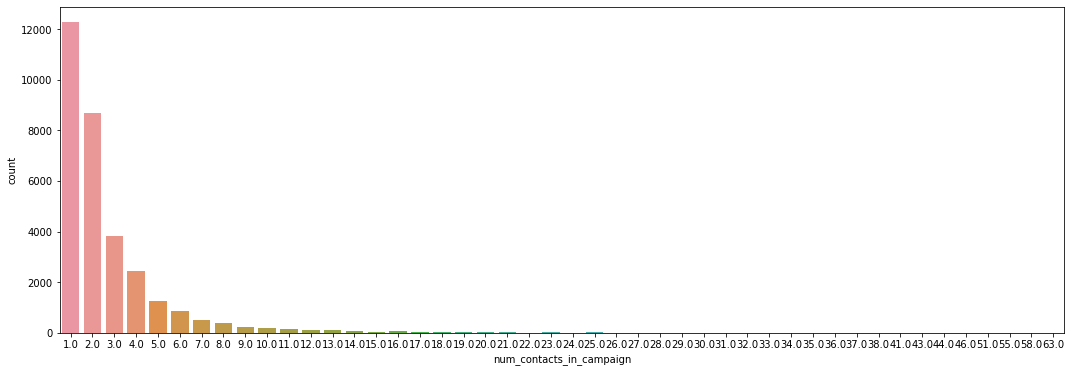

In [30]:
plt.figure(figsize=(18,6))
sns.countplot(x="num_contacts_in_campaign",data=train)

In [31]:
train["num_contacts_in_campaign"]=train["num_contacts_in_campaign"].fillna(train["num_contacts_in_campaign"].mode()[0])

In [32]:
train.head(10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,0,unknown,1
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,0,unknown,1
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,unknown,26,may,210.0,1.0,0,unknown,0
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,0,unknown,0
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,0,unknown,0


In [33]:
train.drop("id",axis=1,inplace=True)

In [34]:
train["prev_campaign_outcome"].groupby(train["communication_type"]).count()

communication_type
cellular     20480
telephone     2016
unknown       9151
Name: prev_campaign_outcome, dtype: int64

In [35]:
train.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [36]:
train["communication_type"].value_counts()

cellular     20480
unknown       9151
telephone     2016
Name: communication_type, dtype: int64

In [37]:
prev_succ_camp=train.loc[train['prev_campaign_outcome'] == 'success']
prev_succ_camp.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
33,31.0,admin.,married,secondary,no,93.000000,yes,no,cellular,18,may,145.0,2.0,1,success,0
35,54.0,management,married,tertiary,no,1459.000000,no,no,cellular,2,oct,195.0,2.0,1,success,1
37,64.0,retired,married,primary,no,50.000000,no,no,cellular,9,sep,162.0,3.0,1,success,1
83,29.0,management,single,tertiary,no,878.000000,yes,no,cellular,16,mar,245.0,1.0,2,success,1
115,62.0,admin.,married,secondary,no,1431.480864,no,no,cellular,22,dec,170.0,1.0,9,success,1


In [38]:
print(prev_succ_camp.shape)
print(train.shape)
print("% of successfull camp",(1070/31647)*100)

(1070, 16)
(31647, 16)
% of successfull camp 3.381047176667615


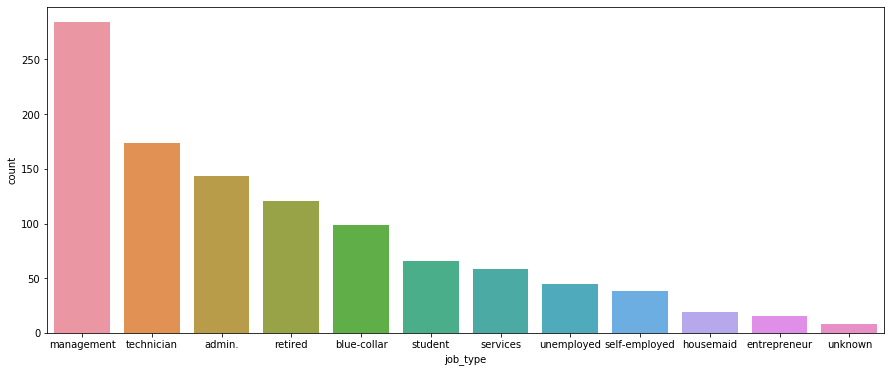

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(x="job_type",data=prev_succ_camp,order=prev_succ_camp["job_type"].value_counts().index)

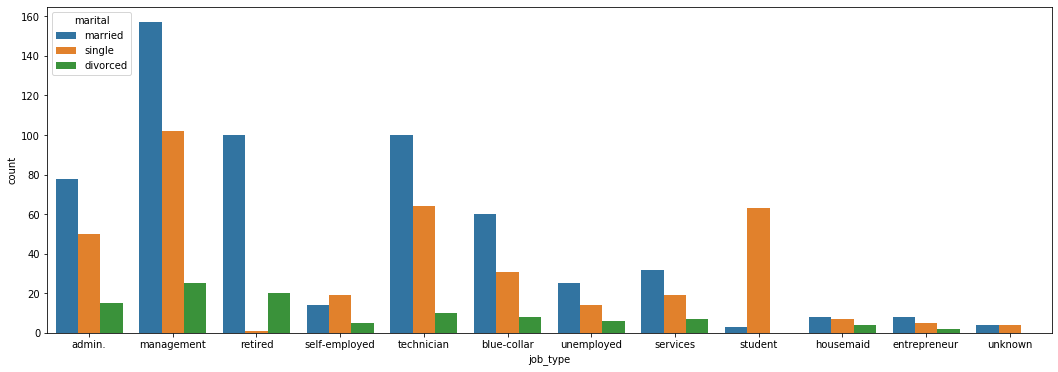

In [40]:
plt.figure(figsize=(18,6))
sns.countplot(x="job_type",hue="marital",data=prev_succ_camp)

cellular     989
telephone     76
unknown        5
Name: communication_type, dtype: int64


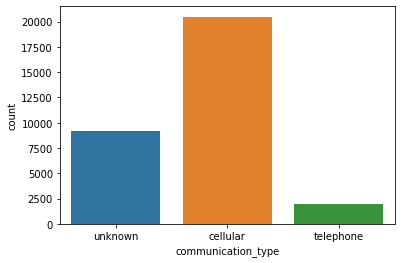

In [41]:
sns.countplot(x="communication_type",data=train)
print(prev_succ_camp["communication_type"].value_counts())

In [42]:
print("%of success for cellular",(989/20480)*100)
print("%of success for telephone",(76/2016)*100)
print("%of success for unknown",(5/9151)*100)

%of success for cellular 4.8291015625
%of success for telephone 3.7698412698412698
%of success for unknown 0.054638837285542564


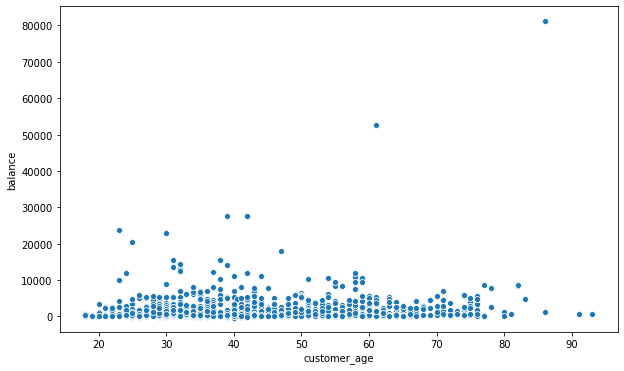

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="customer_age",y="balance",data=prev_succ_camp)

<Figure size 1152x576 with 0 Axes>

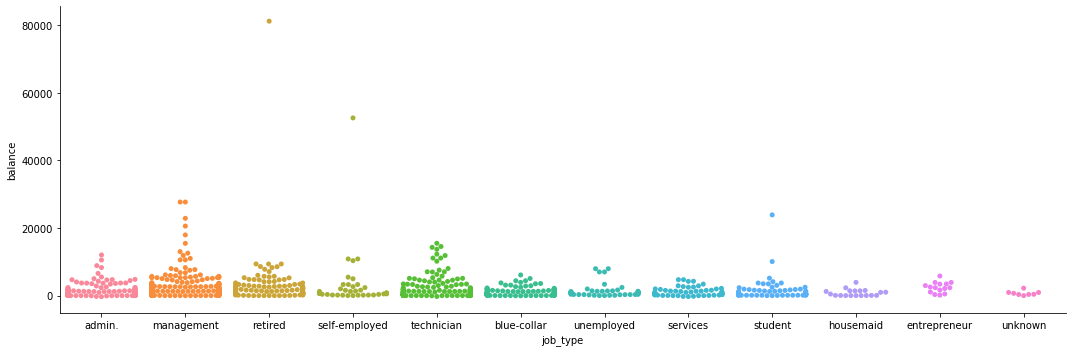

In [44]:
plt.figure(figsize=(16,8))
sns.catplot(x="job_type",y="balance",data=prev_succ_camp,aspect=3,
            kind="swarm")

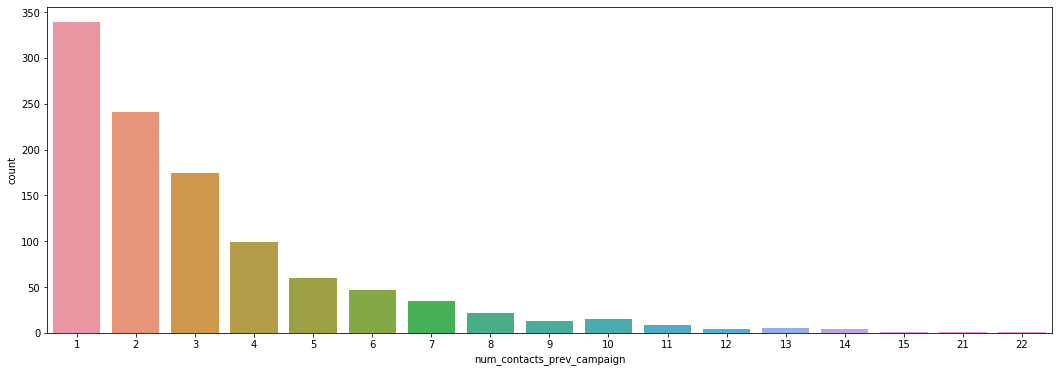

In [45]:
plt.figure(figsize=(18,6))
sns.countplot(x="num_contacts_prev_campaign",data=prev_succ_camp)

<Figure size 1296x432 with 0 Axes>

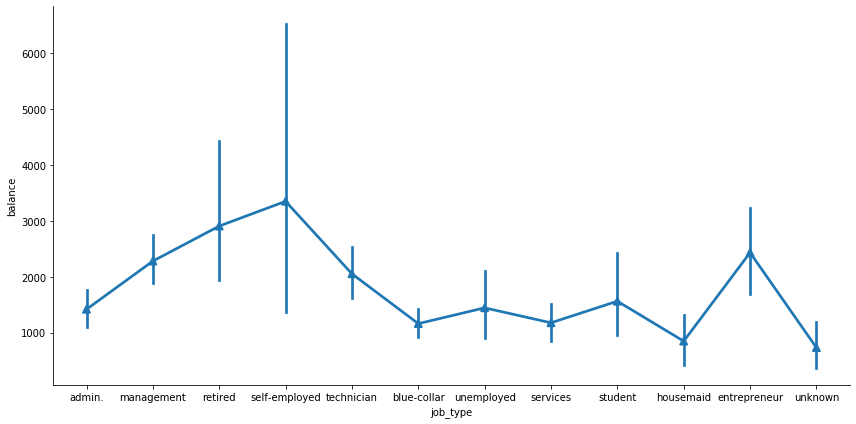

In [46]:
plt.figure(figsize=(18,6))
sns.catplot(x="job_type", y="balance",markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=prev_succ_camp,height=6, aspect=2)

<Figure size 432x864 with 0 Axes>

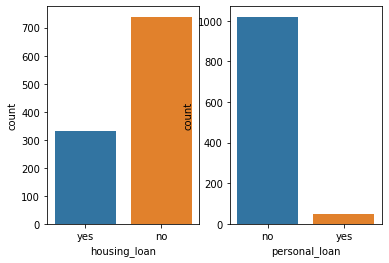

In [47]:
plt.figure(figsize=(6,12))
fig,(ax1,ax2)=plt.subplots(1,2)
sns.countplot(x="housing_loan",data=prev_succ_camp,ax=ax1)
sns.countplot(x="personal_loan",data=prev_succ_camp,ax=ax2)

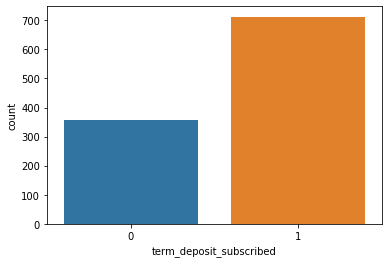

In [49]:
sns.countplot(x="term_deposit_subscribed",data=prev_succ_camp)

In [50]:
prev_succ_camp["term_deposit_subscribed"].value_counts()

1    712
0    358
Name: term_deposit_subscribed, dtype: int64

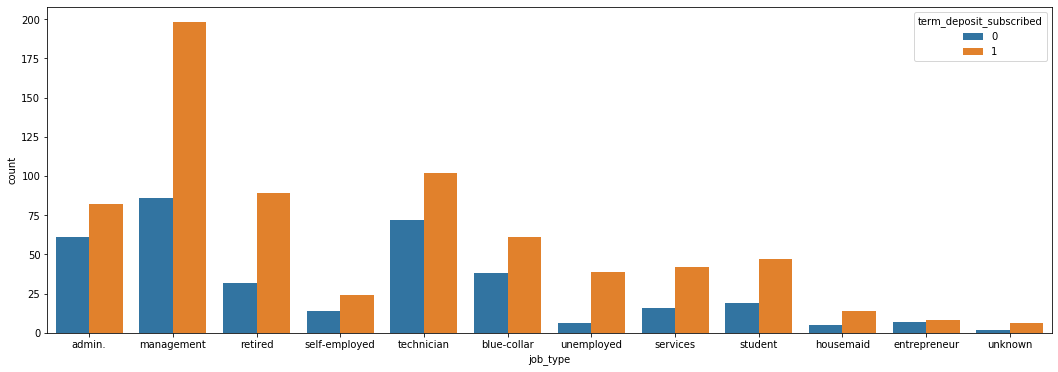

In [51]:
plt.figure(figsize=(18,6))
sns.countplot(x="job_type",hue="term_deposit_subscribed",data=prev_succ_camp)

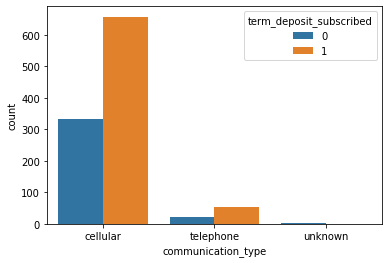

In [52]:
sns.countplot(x="communication_type",hue='term_deposit_subscribed',data=prev_succ_camp)

In [53]:
train.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

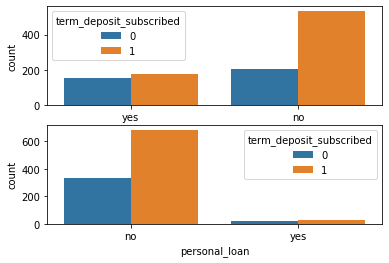

In [54]:
#def plot(df,col):
fig,(ax1,ax2)=plt.subplots(2,1)
sns.countplot(x="housing_loan",hue='term_deposit_subscribed',data=prev_succ_camp,ax=ax1)
sns.countplot(x="personal_loan",hue='term_deposit_subscribed',data=prev_succ_camp,ax=ax2)

In [55]:
train["default"].groupby(train['term_deposit_subscribed']).count()

term_deposit_subscribed
0    28253
1     3394
Name: default, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [57]:
train.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0


In [58]:
train.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [59]:
for i in ['job_type', 'marital', 'education', 'default','housing_loan', 'personal_loan', 'communication_type','month','prev_campaign_outcome']:
    train[i]= encoder.fit_transform(train[i])

In [60]:
train.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4,2,2,0,285.0,1,0,2,26,6,303.0,4.0,0,3,0
1,34.0,1,1,1,0,934.0,0,1,0,18,9,143.0,2.0,1,1,0
2,46.0,9,1,1,0,656.0,0,0,0,5,3,101.0,4.0,0,3,0
3,34.0,7,2,1,0,2.0,1,0,2,20,8,127.0,3.0,0,3,0
4,41.0,1,1,0,0,1352.0,1,0,0,13,8,49.0,2.0,0,3,0


In [189]:
df_test=pd.read_csv("D:/Case_Competition/Factelytics_Case Study/test data.csv")

In [190]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [191]:
df_test.shape

(13564, 17)

In [193]:
test=df_test
test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [194]:
mean_age=test["customer_age"].mean()

In [195]:
test["customer_age"]=test["customer_age"].fillna(mean_age)

In [196]:
test["marital"]=test["marital"].fillna(test["marital"].mode()[0])

In [197]:
balance_martial1=test["balance"].groupby(test["marital"]).mean()
balance_martial1

marital
divorced    1081.919267
married     1398.729723
single      1320.166187
Name: balance, dtype: float64

In [198]:
for row in range(1,len(test)):
    test.at[row,"balance"]=np.where(pd.isnull(test.at[row,"balance"]),balance_martial1.loc[(balance_martial1.index==test.at[row,"marital"]),],test.at[row,"balance"])

In [199]:
test["personal_loan"]=test["personal_loan"].fillna(test["personal_loan"].mode()[0])

In [200]:
test["num_contacts_in_campaign"]=test["num_contacts_in_campaign"].fillna(test["num_contacts_in_campaign"].mode()[0])

In [201]:
job_type=test["last_contact_duration"].groupby(test["job_type"]).mean()

In [202]:
for row in range(1,len(test)):
    test.at[row,"last_contact_duration"]=np.where(pd.isnull(test.at[row,"last_contact_duration"]),job_type.loc[(job_type.index==test.at[row,"job_type"]),],test.at[row,"last_contact_duration"])

In [203]:
test.drop("days_since_prev_campaign_contact",axis=1,inplace=True)

In [204]:
test.drop("id",axis=1,inplace=True)

In [205]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [206]:
test.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome'],
      dtype='object')

In [207]:
for i in ['job_type', 'marital', 'education', 'default','housing_loan', 'personal_loan', 'communication_type','month','prev_campaign_outcome']:
    test[i]= encoder.fit_transform(test[i])

In [208]:
test.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,55.0,5,1,2,0,7136.0,0,0,0,13,1,90.0,2.0,0,3
1,24.0,1,2,1,0,179.0,1,0,0,18,8,63.0,2.0,0,3
2,46.0,9,0,1,0,143.0,0,0,0,8,5,208.0,1.0,0,3
3,56.0,3,2,3,0,6023.0,0,0,2,6,6,34.0,1.0,0,3
4,62.0,5,1,1,0,2913.0,0,0,0,12,0,127.0,1.0,1,2


In [209]:
print(train.shape)
print(test.shape)

(31647, 16)
(13564, 15)


In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.savefig('heatmap.png.png', dpi=300, bbox_inches='tight')

In [211]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

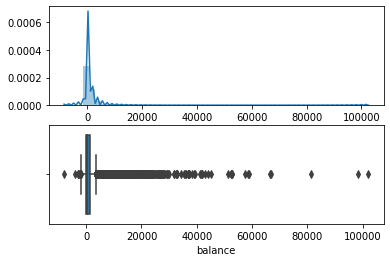

In [212]:
plot(train,'balance')

In [213]:
from sklearn.feature_selection import mutual_info_classif

In [214]:
X= train.drop("term_deposit_subscribed",axis=1)
X.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,28.0,4,2,2,0,285.0,1,0,2,26,6,303.0,4.0,0,3
1,34.0,1,1,1,0,934.0,0,1,0,18,9,143.0,2.0,1,1
2,46.0,9,1,1,0,656.0,0,0,0,5,3,101.0,4.0,0,3
3,34.0,7,2,1,0,2.0,1,0,2,20,8,127.0,3.0,0,3
4,41.0,1,1,0,0,1352.0,1,0,0,13,8,49.0,2.0,0,3


In [215]:
y= train["term_deposit_subscribed"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: term_deposit_subscribed, dtype: int64

In [216]:
mutual_info_classif(X,y)

array([0.01017465, 0.00936649, 0.00483628, 0.00101814, 0.        ,
       0.00956972, 0.01349534, 0.        , 0.01755092, 0.00696809,
       0.02499663, 0.07646485, 0.00511841, 0.01379937, 0.03835953])

In [217]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [218]:
imp.columns=["importance"]
imp

,importance
customer_age,0.009813
job_type,0.007704
marital,0.006078
education,0.006421
default,0.000000
balance,0.009158
housing_loan,0.011904
personal_loan,0.005643
communication_type,0.013492
day_of_month,0.004340


In [219]:
imp.sort_values(by='importance',ascending=False)

,importance
last_contact_duration,0.078168
prev_campaign_outcome,0.038744
month,0.025403
communication_type,0.013492
housing_loan,0.011904
num_contacts_prev_campaign,0.011517
customer_age,0.009813
balance,0.009158
job_type,0.007704
education,0.006421


In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state = 5)

In [222]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [223]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [224]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [225]:
y_pred=clf.predict(X_test)

In [226]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [227]:
confusion_matrix(y_test,y_pred)

array([[8260,  181],
       [ 635,  419]], dtype=int64)

In [228]:
accuracy_score(y_test,y_pred)

0.9140600315955766

In [229]:
precision_score(y_test,y_pred)

0.6983333333333334

In [230]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2=metrics.r2_score(y_test,y_pred)
print("r2 score is",r2)
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#sns.distplot(y_test-y_pred)

r2 score is 0.1291354410691289
MAE 0.08593996840442338
MSE 0.08593996840442338
RMSE 0.2931551950834632


In [231]:
from sklearn.metrics import f1_score

In [232]:
f1_score(y_test, y_pred, average='macro')

0.7297904312739906

In [233]:
f1_score(y_test, y_pred, average='micro')

0.9140600315955766

In [234]:
f1_score(y_test, y_pred, average='weighted')

0.903390678382211

In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                13564 non-null  float64
 1   job_type                    13564 non-null  int32  
 2   marital                     13564 non-null  int32  
 3   education                   13564 non-null  int32  
 4   default                     13564 non-null  int32  
 5   balance                     13564 non-null  float64
 6   housing_loan                13564 non-null  int32  
 7   personal_loan               13564 non-null  int32  
 8   communication_type          13564 non-null  int32  
 9   day_of_month                13564 non-null  int64  
 10  month                       13564 non-null  int32  
 11  last_contact_duration       13564 non-null  float64
 12  num_contacts_in_campaign    13564 non-null  float64
 13  num_contacts_prev_campaign  135

In [236]:
test.head(20)

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,55.0,5,1,2,0,7136.0,0,0,0,13,1,90.000000,2.0,0,3
1,24.0,1,2,1,0,179.0,1,0,0,18,8,63.000000,2.0,0,3
2,46.0,9,0,1,0,143.0,0,0,0,8,5,208.000000,1.0,0,3
3,56.0,3,2,3,0,6023.0,0,0,2,6,6,34.000000,1.0,0,3
4,62.0,5,1,1,0,2913.0,0,0,0,12,0,127.000000,1.0,1,2
5,35.0,6,2,2,0,355.0,0,0,0,12,1,599.000000,1.0,0,3
6,27.0,3,2,1,0,718.0,1,0,2,8,8,94.000000,3.0,0,3
7,29.0,4,2,2,0,54.0,1,1,2,26,8,253.000000,3.0,0,3
8,50.0,3,1,1,0,3815.0,0,0,2,9,6,136.000000,2.0,0,3
9,37.0,4,2,2,0,52.0,1,1,0,25,5,211.000000,1.0,0,3


In [237]:
train.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4,2,2,0,285.0,1,0,2,26,6,303.0,4.0,0,3,0
1,34.0,1,1,1,0,934.0,0,1,0,18,9,143.0,2.0,1,1,0
2,46.0,9,1,1,0,656.0,0,0,0,5,3,101.0,4.0,0,3,0
3,34.0,7,2,1,0,2.0,1,0,2,20,8,127.0,3.0,0,3,0
4,41.0,1,1,0,0,1352.0,1,0,0,13,8,49.0,2.0,0,3,0


In [239]:
pred= clf.predict(test)

In [245]:
prediction=pd.DataFrame(pred)
prediction[0].value_counts()

0    12713
1      851
Name: 0, dtype: int64

In [247]:
sample_submission=pd.read_csv("D:/Case_Competition/Factelytics_Case Study/Sample Submission.csv")

In [249]:
sample_submission['term_deposit_subscribed']=prediction
sample_submission.head()

,id,term_deposit_subscribed
0,id_17231,0
1,id_34508,0
2,id_44504,0
3,id_174,0
4,id_2115,0


In [250]:
sample_submission.to_csv("sample_submission1.csv")